<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Team 7 | Mobile App Survey Data Analysis</h2><br><br>
Machine Learning<br>
<strong>Hult International Business School

    Cindy Moreno and Mihir Sachdeva 
</strong>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Executive Summary 

This is the assignment which analyzes the Mobile app data. The analyses methods used were PCA and Clustering. The marketing team should target cluster 3 and promote the app through word of mouth and focus on privacy features and options for users to chose how anonymous they want to be. The app should have frequent updates and keep up with new trends but not end up utlizing too much time for updates and data consumption. Due to the volatile consumer demand, it is important to focus on initial boosting of the app and moderating the expense for first time users. 

# Part I | Importing Data and Descriptive Statistics 

In this review, we are given a Mobile App study taken by 1552 clients of various demographics. 
We began by stacking our dataset, checking out the information to comprehend assuming that there were any missing qualities, learning the measurements, and refreshing the segment names dependent on the study survey given in pdf design.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /> 

In [5]:

import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()

# loading the dataset from system files
file = "Mobile_App_Survey_Data.xlsx"

#mar stands for mobile research survey
mar_survey = pd.read_excel(io         = file,
                           sheet_name = 0,
                           header     = 0)

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
np.set_printoptions(threshold = sys.maxsize)


mar_survey.head(n = 5)                       

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3,4,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2,2,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1,5,2,1,0,0,0,0,3,2,4,2


In [6]:
# code used from script 11 provided by Professor Chase

########################################
# pca_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# pca_plotter
def pca_plotter(bunch,
                colors  = None,
                x_label = "First principal component",
                y_label = "Second principal component"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in PCA
colors       : color coding for target labels, default None
x_label      : x-label for PC 0, default "First principal component"
y_label      : y-label for PC 1, default "Second principal component"
"""

    # INSTANTIATING a PCA object
    pca = PCA(n_components = 2,
              random_state = 219)


    # FITTING and TRANSFORMING the data
    dataset_pca = pca.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_pca[:, 0].min(), dataset_pca[:, 0].max())
    plt.ylim(dataset_pca[:, 1].min(), dataset_pca[:, 1].max())


    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_pca[i, 0],
                 dataset_pca[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()

    
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [7]:
mar_survey.keys()

Index(['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57'], dtype='object')

In [8]:
# code used from script 11 provided by Professor Chase

########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [9]:
# checking information about each column
mar_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 88 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   caseID  1552 non-null   int64
 1   q1      1552 non-null   int64
 2   q2r1    1552 non-null   int64
 3   q2r2    1552 non-null   int64
 4   q2r3    1552 non-null   int64
 5   q2r4    1552 non-null   int64
 6   q2r5    1552 non-null   int64
 7   q2r6    1552 non-null   int64
 8   q2r7    1552 non-null   int64
 9   q2r8    1552 non-null   int64
 10  q2r9    1552 non-null   int64
 11  q2r10   1552 non-null   int64
 12  q4r1    1552 non-null   int64
 13  q4r2    1552 non-null   int64
 14  q4r3    1552 non-null   int64
 15  q4r4    1552 non-null   int64
 16  q4r5    1552 non-null   int64
 17  q4r6    1552 non-null   int64
 18  q4r7    1552 non-null   int64
 19  q4r8    1552 non-null   int64
 20  q4r9    1552 non-null   int64
 21  q4r10   1552 non-null   int64
 22  q4r11   1552 non-null   int64
 23  q11     1552 

In [10]:
# summary of decriptive statistics
mar_survey.describe(include = 'number').round(decimals = 2)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
count,1552.00,1552.00,1552.0,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00
mean,1192.85,4.51,0.5,0.24,0.36,0.2,0.06,0.09,0.04,0.19,0.04,0.0,0.69,0.19,0.46,0.27,0.76,0.81,0.53,0.47,0.35,0.08,0.02,3.08,4.22,1.41,2.72,3.31,2.44,3.22,1.61,3.41,3.34,2.82,2.70,3.11,2.46,3.16,1.70,2.22,3.24,2.87,1.81,2.07,1.99,3.81,2.05,2.44,1.98,2.37,2.46,2.24,2.27,2.38,4.29,2.12,2.66,2.16,2.18,2.44,2.75,3.02,2.15,3.00,3.00,3.04,3.25,3.28,2.59,2.80,3.86,3.10,3.33,3.32,2.42,3.12,2.55,3.58,1.90,0.5,0.19,0.18,0.15,0.16,1.73,1.85,7.80,1.53
std,712.01,2.40,0.5,0.43,0.48,0.4,0.23,0.28,0.20,0.40,0.19,0.0,0.46,0.39,0.50,0.44,0.42,0.39,0.50,0.50,0.48,0.27,0.13,1.02,1.34,0.88,1.24,1.01,1.18,1.07,0.80,0.96,0.99,1.17,1.18,1.07,1.26,1.54,0.96,1.40,1.57,1.45,1.05,1.10,1.04,1.61,1.09,1.28,1.03,1.12,1.22,1.08,1.10,1.17,1.55,1.05,1.24,1.12,1.14,1.17,1.33,1.51,1.16,1.41,1.33,1.42,1.47,1.46,1.36,1.36,1.76,1.42,1.53,1.42,1.19,1.44,1.28,1.22,0.93,0.5,0.39,0.39,0.35,0.37,1.49,0.36,3.72,0.50
min,1.00,1.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,570.75,2.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,3.00,1.00,1.00,3.00,1.00,2.00,1.00,3.00,3.00,2.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,0.0,0.00,0.00,0.00,0.00,1.00,2.00,5.00,1.00
50%,1144.50,4.00,1.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,3.00,4.00,1.00,3.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,1.00,2.00,3.00,3.00,1.00,2.00,2.00,4.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.00,2.00,3.00,2.00,2.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,4.00,2.00,1.0,0.00,0.00,0.00,0.00,1.00,2.00,7.50,2.00
75%,1833.50,6.00,1.0,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,5.00,1.00,4.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,2.00,3.00,4.00,4.00,2.00,3.00,3.00,5.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,6.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,6.00,4.00,4.00,4.00,3.00,4.00,3.00,4.00,2.00,1.0,0.00,0.00,0.00,0.00,2.00,2.00,11.00,2.00
max,2396.00,11.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,6.0

# The investigation is drawn from descriptive statistics measurements:

In the questions Q24 through Q26,  it may be seen that 75% of qualities are not exactly normal and that are below the average for our dataset, it is conceivable that the clients who took the review might have haphazardly chosen one of the accessible choices. Additionally, it is seen that the vast majority of half of the qualities are either 2 or 3. Based on this we should scale these qualities both on a level plane and in an upward direction to eliminate any predisposition that might be available prior to run the PCA analysis.<br><br> 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Part II | Dividing information into datasets reflecting various scales and measurements</h3><br> 

In the wake of looking at the introduced questions and sub-questions, we chose to isolate them and consolidate them into suitable gatherings that best mirror their quintessence, scale, and metric:

Demographic data -  We have consolidated inquiries in regards to age, education, marital status, children, race, annual income, and gender.

Psychometric - behavioral data-  We have added questions 24 through 26 to this segment. We fail to understand the application of such outputs as they seem naive and vague for some subquestions. Consequently, in further analysis, it can be seen that there is little to no application of the same. 

Histograms assist with dissecting the skewness and help break down on the off chance that any logarithmic changes are required. Taking a gander at the Histograms, we could see some skewness with not many segment highlights, notwithstanding, we didn't change any qualities into logarithmic qualities as the qualities were attributed as reaction numbers, thus our dataset doesn't need changes.



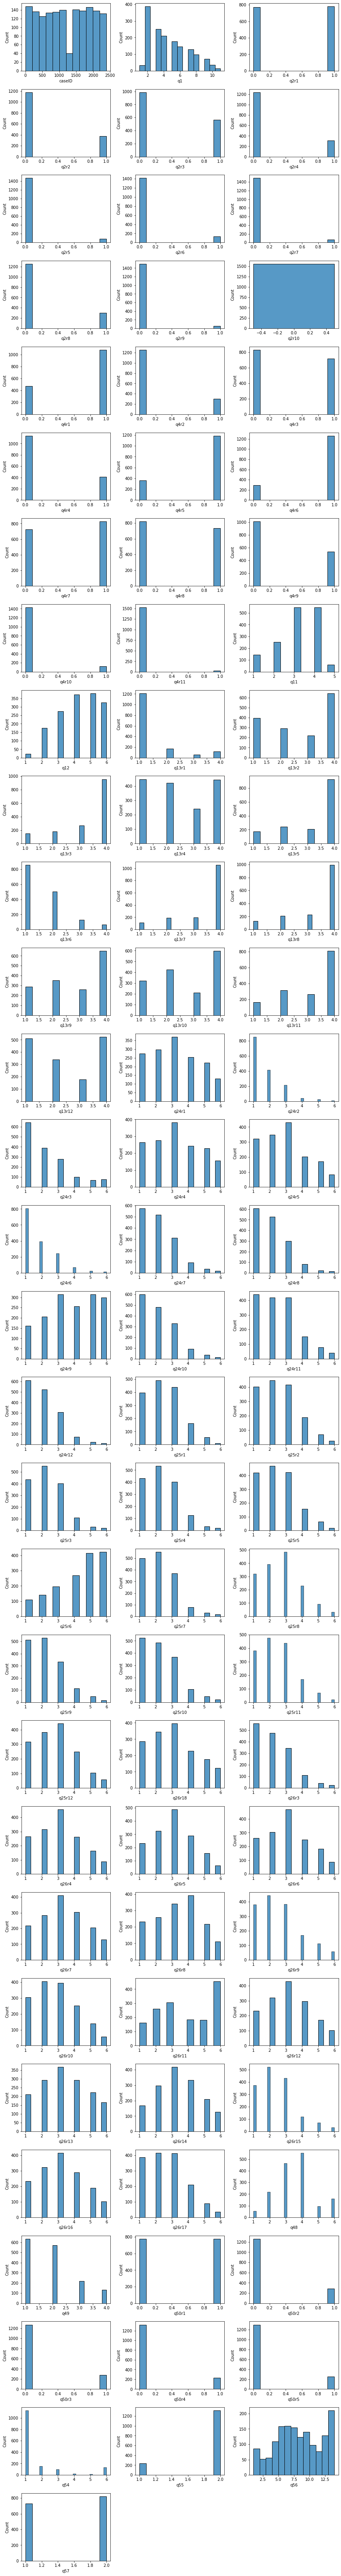

In [8]:
# setting figure size
fig, ax = plt.subplots(figsize = (12, 90))


# initializing a counter
count = 0


# looping to create visualizations
for col in mar_survey:

    # condition to break
    if count == 88:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(30, 3, count)
    sns.histplot(x = mar_survey[col],)


# formatting, saving, and displaying the plot
plt.tight_layout()
plt.savefig('mar_survey_histograms.png')
plt.show()

In [11]:
mar_survey.columns

Index(['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57'], dtype='object')

In [12]:
mar_survey.columns = ['caseID', 'age', 'iPhone', 'iPad', 'android', 'blackberry', 
                      'nokia', 'windows', 'hp', 'tablet', 'other_smartphone', 
                      'none_phone', 'music_apps', 'tv_apps', 'entertainment_apps', 
                      'tv_shows', 'gaming_apps', 'social_apps', 'generalnews_apps', 
                      'shopping_apps', 'spnews_apps','other_apps', 'none_apps', 'total_apps', 
                      'free_apps', 'wv_facebook', 'wv_twitter', 'wv_myspace','wv_pandora',
                      'wv_vevo', 'wv_youtube', 'wv_aol', 'wv_lastfm', 'wv_yahoo', 'wv_imdb',
                      'wv_linkedin', 'wv_netflix', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 
                      'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 
                      'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 
                      'q25r9', 'q25r10','q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4',
                      'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 
                      'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17', 
                      'education', 'marital_stat', 'children_no', 'children_below6', 
                      'children_6to12', 'children_13to17', 'children_above18', 
                      'race', 'hisp_lat', 'annual_income', 'gender']



In [13]:
mar_q24_26 = mar_survey.loc[: ,['q24r1', 'q24r2', 'q24r3', 'q24r4', 
                                'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 
                                'q24r10', 'q24r11', 'q24r12', 'q25r1', 
                                'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 
                                'q25r9', 'q25r10','q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4',
                                'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 
                                'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']]

In [14]:
mar_q24_26

,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17
0,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4
1,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2
2,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3
3,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2
4,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1,1,3,2,1,1,3,1,5,3,3,1,1,1,1,1,1,6,1,6,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,1,1,4,6,1
1548,6,1,1,4,2,1,3,1,6,1,2,1,2,2,2,2,1,5,2,4,1,3,4,3,2,2,1,5,1,2,1,3,1,2,3,1,3,1,1,2
1549,1,2,1,2,2,1,1,2,2,1,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,3,2,1,3,2,2,2,3,3,1,2,2,3,3,2
1550,3,2,1,3,4,1,2,2,5,1,3,2,2,2,1,2,1,4,3,2,2,2,3,4,3,1,3,2,2,3,1,1,1,3,2,4,2,2,4,2


In [15]:
scaler = StandardScaler()
mar_scaled = scaler.fit_transform(mar_q24_26.T).T

In [16]:
mar_scaled.T

array([[ 1.07384651, -1.05978406,  1.01339242,  0.07088812,  0.70710678,
         1.60451491,  1.44115338,  2.51753112,  1.44533204,  0.12144654,
        -0.67654006, -0.85143137,  1.58229253,  1.24644541,  1.05821343,
         1.33936787,  1.2686564 , -0.91864405,  2.47192537,  0.65103077,
        -0.65396201, -0.29724096, -0.37796447,  0.03298696,  1.76336046,
         1.48988855,  0.24124895,  2.22083871, -0.05986843, -0.8553372 ,
        -0.56471022,  1.02934186, -0.82311614,  2.27695116,  1.37281295,
         0.        ,  2.27571127,  1.98304359, -0.66421645, -0.06187211,
        -0.16737904,  0.23643312,  1.18967081, -0.31448545,  1.        ,
        -1.63524712,  1.95037223,  0.        ,  0.39266074,  1.05730976,
        -1.03889131, -0.05092065,  0.63754981,  1.0533246 , -0.31448545,
         1.14067987, -0.65465367,  1.96688878, -1.21781906, -2.04604231,
         1.74226195, -1.28914803, -0.75592895,  2.42592712, -0.24828177,
        -1.13059481, -0.3941159 ,  1.1055416 ,  0.5

In [17]:
mar_scaled_df = pd.DataFrame(data = mar_scaled)

mar_scaled_df.head(n = 10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1.073847,-1.128916,-1.128916,1.073847,1.073847,-0.027535,1.073847,-1.128916,-0.027535,-1.128916,-1.128916,-1.128916,1.073847,1.073847,-0.027535,1.073847,-0.027535,1.073847,-0.027535,1.073847,-1.128916,-1.128916,-0.027535,1.073847,1.073847,-2.230297,-1.128916,-1.128916,-1.128916,1.073847,1.073847,-1.128916,-0.027535,2.175228,-0.027535,-0.027535,-0.027535,-0.027535,-0.027535,-0.027535
1,-1.059784,-1.059784,0.783319,-1.059784,-1.059784,-1.059784,-1.059784,-1.059784,-1.059784,-1.059784,0.783319,0.783319,-1.059784,0.783319,-1.059784,0.783319,0.783319,-1.059784,0.783319,-1.059784,0.783319,0.783319,0.783319,-1.059784,0.783319,0.783319,0.783319,0.783319,-1.059784,-1.059784,2.626421,0.783319,0.783319,-1.059784,-1.059784,0.783319,0.783319,0.783319,0.783319,0.783319
2,1.013392,-0.711531,-1.573992,-0.711531,-0.711531,-0.711531,-1.573992,-0.711531,-0.711531,0.150931,1.013392,-0.711531,-0.711531,1.013392,0.150931,-1.573992,1.013392,1.013392,0.150931,0.150931,0.150931,-0.711531,-0.711531,0.150931,1.875854,-2.436454,0.150931,-0.711531,1.013392,1.875854,1.013392,1.013392,1.013392,-0.711531,1.013392,1.013392,0.150931,1.013392,-0.711531,-0.711531
3,0.070888,-1.346874,-1.346874,0.070888,-1.346874,-1.346874,-1.346874,0.070888,0.070888,0.070888,0.070888,1.488651,0.070888,0.070888,0.070888,0.070888,-1.346874,0.070888,-1.346874,1.488651,0.070888,0.070888,0.070888,-1.346874,1.488651,-1.346874,-1.346874,0.070888,0.070888,2.906413,1.488651,0.070888,0.070888,0.070888,1.488651,0.070888,1.488651,0.070888,0.070888,0.070888
4,0.707107,0.707107,0.707107,-0.707107,-0.707107,0.707107,0.707107,-0.707107,0.707107,0.707107,-0.707107,-0.707107,0.707107,-0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,-0.707107,-0.707107,-2.121320,-2.121320,-0.707107,-0.707107,-2.121320,2.121320,0.707107,0.707107,0.707107,-0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107,-2.121320
5,1.604515,-1.312785,1.604515,-1.312785,-0.145865,-0.729325,1.021055,-0.729325,1.604515,-0.145865,-0.145865,-0.729325,-1.312785,-0.729325,-0.729325,-0.729325,-0.145865,1.604515,-1.312785,-0.729325,-0.729325,-1.312785,-0.145865,-1.312785,-1.312785,1.021055,1.021055,-0.145865,1.604515,0.437595,1.021055,1.021055,1.021055,1.604515,0.437595,0.437595,0.437595,-0.729325,-0.729325,-0.145865
6,1.441153,-0.960769,0.640513,0.640513,0.640513,-0.960769,-0.960769,-0.960769,3.042435,-0.960769,-0.960769,-0.960769,-0.160128,-0.160128,-0.160128,-0.960769,-0.960769,3.042435,-0.960769,1.441153,0.640513,0.640513,0.640513,0.640513,-0.160128,-0.960769,-0.160128,0.640513,-0.960769,0.640513,-0.960769,-0.160128,-0.160128,0.640513,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.960769
7,2.517531,-0.884538,-0.884538,1.156703,-0.204124,-0.884538,-0.884538,-0.884538,2.517531,-0.204124,-0.204124,-0.884538,-0.884538,-0.884538,-0.884538,-0.884538,-0.204124,1.837117,-0.884538,-0.884538,-0.884538,-0.884538,-0.204124,1.156703,-0.204124,-0.884538,0.476290,0.476290,-0.884538,0.476290,0.476290,-0.204124,1.156703,1.156703,-0.204124,1.156703,1.156703,-0.204124,1.156703,-0.884538
8,1.445332,-0.930556,0.653369,2.237295,-0.138593,-0.138593,-1.722519,-1.722519,1.445332,-1.722519,0.653369,-0.930556,-0.138593,-0.138593,-0.138593,-0.930556,-0.138593,1.445332,-0.930556,0.653369,-0.138593,0.653369,1.445332,0.653369,-0.138593,-0.138593,0.653369,-0.138593,-0.138593,-0.138593,0.653369,-0.930556,-0.138593,2.237295,0.653369,-0.930556,-0.138593,-0.138593,-0.930556,-1.722519
9,0.121447,-0.850126,1.093019,0.121447,2.064591,0.121447,-1.821698,0.121447,2.064591,0.121447,0.121447,0.121447,-0.850126,-0.850126,0.121447,-0.850126,-0.850126,2.064591,-0.850126,-0.850126,0.121447,-0.850126,-0.850126,0.121447,-0.850126,-0.850126,0.121447,-0.850126,0.121447,-0.850126,2.064591,-0.850126,0.121447,2.064591,1.093019,1.093019,-0.850126,-0.850126,0.121447,0.121447


In [18]:
mar_scaled_df.columns = ['q24r1', 'q24r2', 'q24r3', 'q24r4', 
                         'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 
                         'q24r10', 'q24r11', 'q24r12', 'q25r1', 
                         'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 
                         'q25r9', 'q25r10','q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4',
                         'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 
                         'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']

In [19]:
# scaling (normalizing) variables before correlation analysis
drop_lst = ['caseID', 'age', 'other_smartphone', 'none_phone', 'education', 'marital_stat', 
            'children_no', 'children_below6', 'children_6to12', 'children_13to17', 
            'children_above18', 'race', 'hisp_lat', 'annual_income', 'gender',
            'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 
            'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 
            'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10','q25r11', 'q25r12', 
            'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 
            'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']


# dropping demographic information
app_purchase_behavior = mar_survey.drop(drop_lst,
                                      axis = 1)


# applying the unsupervised_scaler function
app_purchases_scaled = unsupervised_scaler(df = app_purchase_behavior)


# checking pre- and post-scaling variance
print(np.var(app_purchase_behavior), '\n\n')
print(np.var(app_purchases_scaled))

iPhone                0.249990
iPad                  0.182908
android               0.231517
blackberry            0.160617
nokia                 0.052342
windows               0.080481
hp                    0.039537
tablet                0.156329
music_apps            0.212136
tv_apps               0.154745
entertainment_apps    0.248698
tv_shows              0.195295
gaming_apps           0.179871
social_apps           0.151941
generalnews_apps      0.248962
shopping_apps         0.249232
spnews_apps           0.227073
other_apps            0.072972
none_apps             0.017094
total_apps            1.041629
free_apps             1.801433
wv_facebook           0.768333
wv_twitter            1.538911
wv_myspace            1.019038
wv_pandora            1.393160
wv_vevo               1.150461
wv_youtube            0.644934
wv_aol                0.915226
wv_lastfm             0.983015
wv_yahoo              1.360026
wv_imdb               1.393093
wv_linkedin           1.140896
wv_netfl

In [20]:
#Concatting the scaled q24 to q26 and the other scaled dataset as above
mobileapp_scaled = pd.concat([app_purchases_scaled,mar_scaled_df],
                         axis=1)

mobileapp_scaled.shape

(1552, 73)

# Part III | Principal Component Analysis of Tech-based data

The Principal Component analysis has similar aspects as the first information network; notwithstanding, a considerable lot of the PCs may not be useful, so a decrease in the number of PCs is normally required. To do as such, it is valuable to look at the measure of change clarified by each new PC vector.

This test is once in a while censured for its subjectivity. Scree plots can have different "elbows" that make it hard to know the right number of elements or parts to hold, making the test untrustworthy.

AI is an issue of compromises. The exemplary issue is over-fitting versus under-fitting. Over-fitting happens when a model retains its preparation information so well that it is learning commotion on top of the sign.


In [21]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 25,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
mar_survey_pca = pca.fit_transform(mobileapp_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", mobileapp_scaled.shape)
print("PCA shape     :", mar_survey_pca.shape)

Original shape: (1552, 73)
PCA shape     : (1552, 25)


In [22]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.098
PC 2: 0.064
PC 3: 0.038
PC 4: 0.036
PC 5: 0.03
PC 6: 0.026
PC 7: 0.024
PC 8: 0.024
PC 9: 0.024
PC 10: 0.021
PC 11: 0.021
PC 12: 0.019
PC 13: 0.017
PC 14: 0.017
PC 15: 0.017
PC 16: 0.016
PC 17: 0.016
PC 18: 0.015
PC 19: 0.015
PC 20: 0.014
PC 21: 0.014
PC 22: 0.013
PC 23: 0.013
PC 24: 0.013
PC 25: 0.012


In [23]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum())

0.6174017144256877


In [24]:
# calling the scree_plot function
help(scree_plot)

Help on function scree_plot in module __main__:

scree_plot(pca_object, export=False)
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)



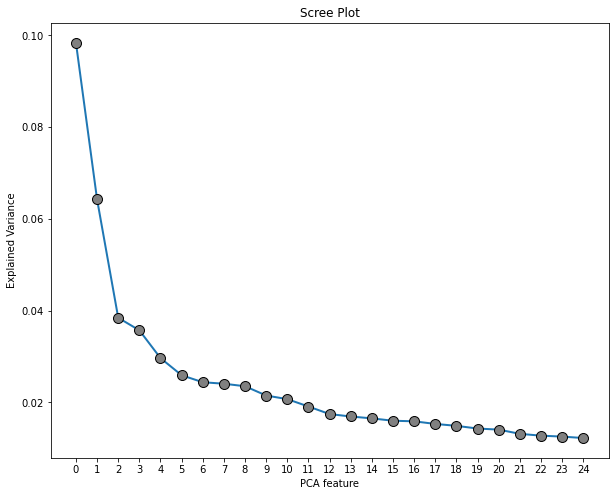

In [25]:
scree_plot(pca_object = pca,
           export = False)

In [26]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 5,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
mar_survey_pca = pca.fit_transform(mobileapp_scaled)


# comparing dimensions of each DataFrame
print("PCA shape     :", mar_survey_pca.shape)

PCA shape     : (1552, 5)


In [27]:
# component number counter
component_number    = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number    += 1
    print(f"""
PC:                  {component_number}
Percentage Variance: {variance.round(3)}""") 


PC:                  1
Percentage Variance: 0.098

PC:                  2
Percentage Variance: 0.064

PC:                  3
Percentage Variance: 0.038

PC:                  4
Percentage Variance: 0.036

PC:                  5
Percentage Variance: 0.03


# Scree Plot Analysis

From the developed scree plot, we can reason that the initial three parts are the recommended parts for us to use in our examination, as these are the parts clarifying the most change of around 20%, in spite of the proposed 80%, henceforth continuing with three parts as these are the components that are adding worth and building our DataFrame for the purpose of clustering.<br>

- The first PC has 9.8% of variance explained.
- The second PC has 6.4% of variance explained.
- The third PC has 3.8% of variance explained.



In [28]:
# INSTANTIATING a PCA object with no limit to principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
mar_survey_pca_3 = pca_3.fit_transform(mobileapp_scaled)


# comparing dimensions of each DataFrame
print("PCA shape     :", mar_survey_pca_3.shape)


PCA shape     : (1552, 3)


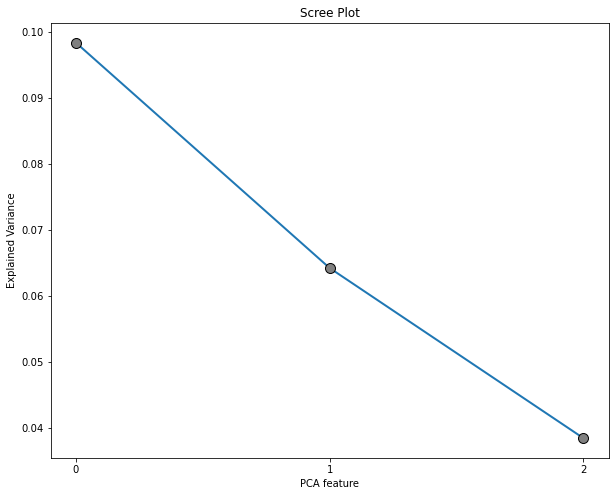

In [29]:
scree_plot(pca_object=pca_3)

In [30]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(mobileapp_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(mobileapp_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                       0     1     2     3     4
iPhone              0.05 -0.14  0.28  0.20  0.21
iPad                0.14 -0.02  0.12  0.06  0.07
android             0.03  0.01 -0.15 -0.21 -0.10
blackberry          0.11  0.08 -0.06  0.01 -0.16
nokia               0.12  0.09  0.01  0.06 -0.12
windows             0.12  0.10  0.02  0.05 -0.10
hp                  0.12  0.05  0.02  0.04 -0.11
tablet              0.14 -0.10  0.18  0.08 -0.03
music_apps          0.08 -0.18  0.21 -0.01  0.17
tv_apps             0.22 -0.01  0.10 -0.00  0.06
entertainment_apps  0.18 -0.11  0.07 -0.02  0.19
tv_shows            0.22 -0.01  0.07  0.00  0.06
gaming_apps         0.09 -0.15 -0.01 -0.11  0.17
social_apps         0.04 -0.26 -0.07 -0.24  0.05
generalnews_apps    0.13 -0.14  0.12  0.03 -0.05
shopping_apps       0.15 -0.17  0.11  0.03  0.06
spnews_apps         0.15 -0.13  0.23  0.03 -0.04
other_apps         -0.03 -0.02  0.06  0.04 -0.03
none_a

In [31]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(mobileapp_scaled.columns)


# checking the result
print(factor_loadings_df)


# saving to Excel
factor_loadings_df.to_excel("appsurvey_loadings.xlsx")

                       0     1     2     3     4
iPhone              0.05 -0.14  0.28  0.20  0.21
iPad                0.14 -0.02  0.12  0.06  0.07
android             0.03  0.01 -0.15 -0.21 -0.10
blackberry          0.11  0.08 -0.06  0.01 -0.16
nokia               0.12  0.09  0.01  0.06 -0.12
windows             0.12  0.10  0.02  0.05 -0.10
hp                  0.12  0.05  0.02  0.04 -0.11
tablet              0.14 -0.10  0.18  0.08 -0.03
music_apps          0.08 -0.18  0.21 -0.01  0.17
tv_apps             0.22 -0.01  0.10 -0.00  0.06
entertainment_apps  0.18 -0.11  0.07 -0.02  0.19
tv_shows            0.22 -0.01  0.07  0.00  0.06
gaming_apps         0.09 -0.15 -0.01 -0.11  0.17
social_apps         0.04 -0.26 -0.07 -0.24  0.05
generalnews_apps    0.13 -0.14  0.12  0.03 -0.05
shopping_apps       0.15 -0.17  0.11  0.03  0.06
spnews_apps         0.15 -0.13  0.23  0.03 -0.04
other_apps         -0.03 -0.02  0.06  0.04 -0.03
none_apps          -0.08  0.14 -0.01  0.12 -0.09
total_apps          

In [32]:
factor_loadings_df.head(n = 5)

,0,1,2,3,4
iPhone,0.05,-0.14,0.28,0.20,0.21
iPad,0.14,-0.02,0.12,0.06,0.07
android,0.03,0.01,-0.15,-0.21,-0.10
blackberry,0.11,0.08,-0.06,0.01,-0.16
nokia,0.12,0.09,0.01,0.06,-0.12


In [33]:
factor_loadings_df.columns = ['Disposable_income',
                              'No_Val_found',
                              'Positive_market',
                              '3',
                              '4',]


# checking the result
factor_loadings_df

,Disposable_income,No_Val_found,Positive_market,3,4
iPhone,0.05,-0.14,0.28,0.20,0.21
iPad,0.14,-0.02,0.12,0.06,0.07
android,0.03,0.01,-0.15,-0.21,-0.10
blackberry,0.11,0.08,-0.06,0.01,-0.16
nokia,0.12,0.09,0.01,0.06,-0.12
windows,0.12,0.10,0.02,0.05,-0.10
hp,0.12,0.05,0.02,0.04,-0.11
tablet,0.14,-0.10,0.18,0.08,-0.03
music_apps,0.08,-0.18,0.21,-0.01,0.17
tv_apps,0.22,-0.01,0.10,-0.00,0.06


In [34]:
# converting into a DataFrame 
mar_survey_pca = pd.DataFrame(mar_survey_pca)


# renaming columns
mar_survey_pca.columns = factor_loadings_df.columns


# checking results
mar_survey_pca

,Disposable_income,No_Val_found,Positive_market,3,4
0,-3.611319,1.182236,-2.576887,0.349652,0.582212
1,2.800270,4.840996,1.913225,-1.571374,-0.246101
2,-2.533301,2.508055,-1.142236,-2.312835,-0.669514
3,-2.115576,1.798427,-0.046092,-1.162205,1.010533
4,0.245389,2.687176,0.401913,1.302662,-0.147322
...,...,...,...,...,...
1547,1.502121,-0.710105,-0.035271,0.711339,1.911912
1548,0.531594,-3.117016,-0.905311,2.381191,2.163604
1549,5.747380,0.308196,3.145645,-1.374711,-0.178080
1550,0.847647,-3.022388,-1.076157,-0.107032,1.328633


In [35]:
from sklearn.decomposition import PCA # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster import KMeans # k-means clustering

In [36]:
# transposing pca components
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(mobileapp_scaled.columns)


# checking the result
print(factor_loadings_3)




                       0     1     2
iPhone              0.05 -0.14  0.28
iPad                0.14 -0.02  0.12
android             0.03  0.01 -0.15
blackberry          0.11  0.08 -0.06
nokia               0.12  0.09  0.01
windows             0.12  0.10  0.02
hp                  0.12  0.05  0.02
tablet              0.14 -0.10  0.18
music_apps          0.08 -0.18  0.21
tv_apps             0.22 -0.01  0.10
entertainment_apps  0.18 -0.11  0.07
tv_shows            0.22 -0.01  0.07
gaming_apps         0.09 -0.15 -0.01
social_apps         0.04 -0.26 -0.07
generalnews_apps    0.13 -0.14  0.12
shopping_apps       0.15 -0.17  0.11
spnews_apps         0.15 -0.13  0.23
other_apps         -0.03 -0.02  0.06
none_apps          -0.08  0.14 -0.01
total_apps          0.06 -0.22  0.18
free_apps          -0.14 -0.03 -0.08
wv_facebook        -0.08  0.15  0.22
wv_twitter         -0.22  0.00  0.03
wv_myspace         -0.25 -0.16  0.07
wv_pandora         -0.17  0.07 -0.02
wv_vevo            -0.26 -0.09  0.01
w

In [37]:
factor_loadings_3.columns = ['Disposable_income',
                              'No_Val_found',
                              'Positive_market']

factor_loadings_3.round(decimals = 2)

,Disposable_income,No_Val_found,Positive_market
iPhone,0.05,-0.14,0.28
iPad,0.14,-0.02,0.12
android,0.03,0.01,-0.15
blackberry,0.11,0.08,-0.06
nokia,0.12,0.09,0.01
windows,0.12,0.10,0.02
hp,0.12,0.05,0.02
tablet,0.14,-0.10,0.18
music_apps,0.08,-0.18,0.21
tv_apps,0.22,-0.01,0.10


In [38]:
# analyzing factor strengths per customer
factor_loadings = pca_3.transform(mobileapp_scaled)


# converting to a DataFrame
df_factor_loadings = pd.DataFrame(factor_loadings)


# renaming columns
df_factor_loadings.columns = factor_loadings_3.columns


# checking the results
df_factor_loadings.head(n = 5).round(decimals = 2)

,Disposable_income,No_Val_found,Positive_market
0,-3.61,1.18,-2.58
1,2.80,4.84,1.91
2,-2.53,2.51,-1.14
3,-2.12,1.80,-0.05
4,0.25,2.69,0.40


In [39]:
# checking variance amongst clusters
np.var(df_factor_loadings)

Disposable_income    6.307933
No_Val_found         4.117609
Positive_market      2.464135
dtype: float64

In [40]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = df_factor_loadings)


# checking pre- and post-scaling variance
print(np.var(df_factor_loadings), '\n\n')
print(np.var(pca_scaled))

Disposable_income    6.307933
No_Val_found         4.117609
Positive_market      2.464135
dtype: float64 


Disposable_income    1.0
No_Val_found         1.0
Positive_market      1.0
dtype: float64


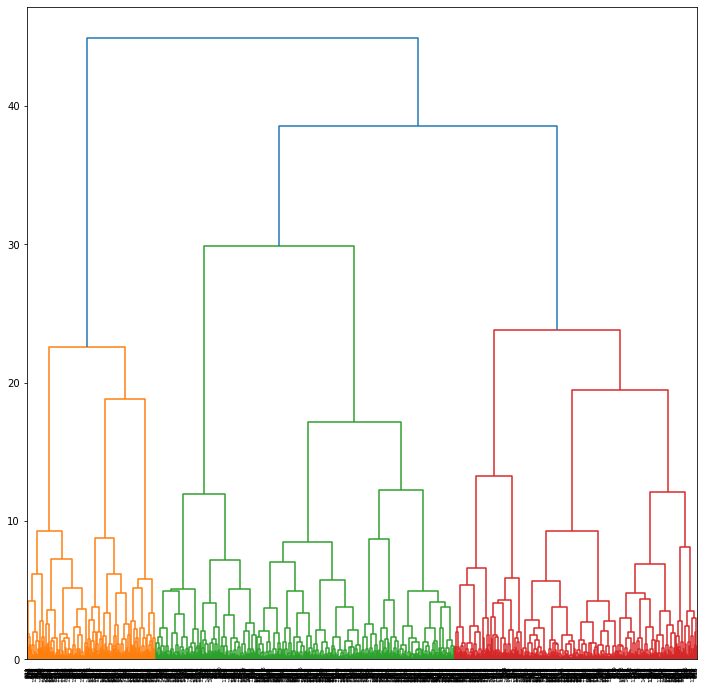

In [41]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

In [42]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 3,
                        random_state  = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    637
1    627
2    288
Name: Cluster, dtype: int64


In [43]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Disposable_income',
                              'No_Val_found',
                              'Positive_market']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Disposable_income,No_Val_found,Positive_market
0,-0.51,0.20,-0.73
1,-0.16,-0.61,0.70
2,1.48,0.88,0.09


In [44]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                          df_factor_loadings],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([mar_survey.loc[ : , ['age', 'other_smartphone', 
                                                     'none_phone', 'education', 'marital_stat', 
                                                     'children_no', 'children_below6', 'children_6to12', 
                                                     'children_13to17', 'children_above18', 
                                                     'race', 'hisp_lat', 'annual_income', 'gender']],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)


# renaming columns
final_pca_clust_df.columns = [  'age', 
                                'other_smartphone', 
                                'none_phone',
                                'education', 
                                'marital_stat', 
                                'children_no', 
                                'children_below6', 
                                'children_6to12', 
                                'children_13to17', 
                                'children_above18', 
                                'race', 
                                'hisp_lat', 
                                'annual_income', 
                                'gender',
                                'Cluster',
                                'Disposable_income',
                                'No_Val_found',
                                'Positive_market']


# checking the results
final_pca_clust_df.head(n = 10)

,age,other_smartphone,none_phone,education,marital_stat,children_no,children_below6,children_6to12,children_13to17,children_above18,race,hisp_lat,annual_income,gender,Cluster,Disposable_income,No_Val_found,Positive_market
0,10,0,0,3,4,1,0,0,0,0,2,2,5,1,0,-3.61,1.18,-2.58
1,5,0,0,5,1,0,1,1,0,0,3,2,10,2,2,2.80,4.84,1.91
2,7,0,0,4,4,0,0,0,1,0,2,2,6,1,0,-2.53,2.51,-1.14
3,7,0,0,2,1,0,1,1,0,0,1,2,5,1,0,-2.12,1.80,-0.05
4,2,0,0,5,2,1,0,0,0,0,3,2,4,2,2,0.25,2.69,0.40
5,9,0,0,4,4,0,0,0,1,1,1,2,8,1,0,-4.58,4.16,-0.38
6,11,0,0,3,1,0,0,0,0,1,1,2,8,2,1,0.93,-2.88,-0.74
7,6,0,0,4,1,0,0,0,1,1,1,2,11,2,0,-2.12,-1.11,-1.88
8,6,0,0,6,2,1,0,0,0,0,1,2,10,1,0,-0.98,-2.09,-1.66
9,10,0,0,5,2,1,0,0,0,0,1,2,9,2,0,-3.40,-0.14,-1.15


In [45]:
final_pca_clust_df.head(n = 5)

,age,other_smartphone,none_phone,education,marital_stat,children_no,children_below6,children_6to12,children_13to17,children_above18,race,hisp_lat,annual_income,gender,Cluster,Disposable_income,No_Val_found,Positive_market
0,10,0,0,3,4,1,0,0,0,0,2,2,5,1,0,-3.61,1.18,-2.58
1,5,0,0,5,1,0,1,1,0,0,3,2,10,2,2,2.80,4.84,1.91
2,7,0,0,4,4,0,0,0,1,0,2,2,6,1,0,-2.53,2.51,-1.14
3,7,0,0,2,1,0,1,1,0,0,1,2,5,1,0,-2.12,1.80,-0.05
4,2,0,0,5,2,1,0,0,0,0,3,2,4,2,2,0.25,2.69,0.40


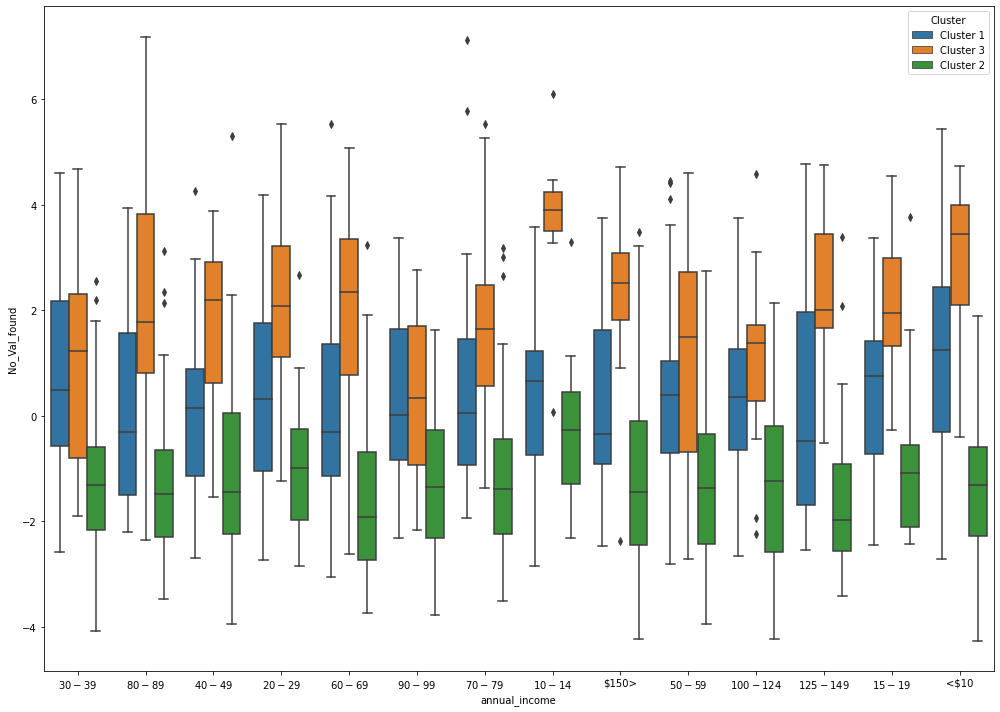

In [48]:
########################
# Annual Income
########################


fig, ax = plt.subplots(figsize = (14, 10))
sns.boxplot(   x = 'annual_income',
               y = 'No_Val_found',
             hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

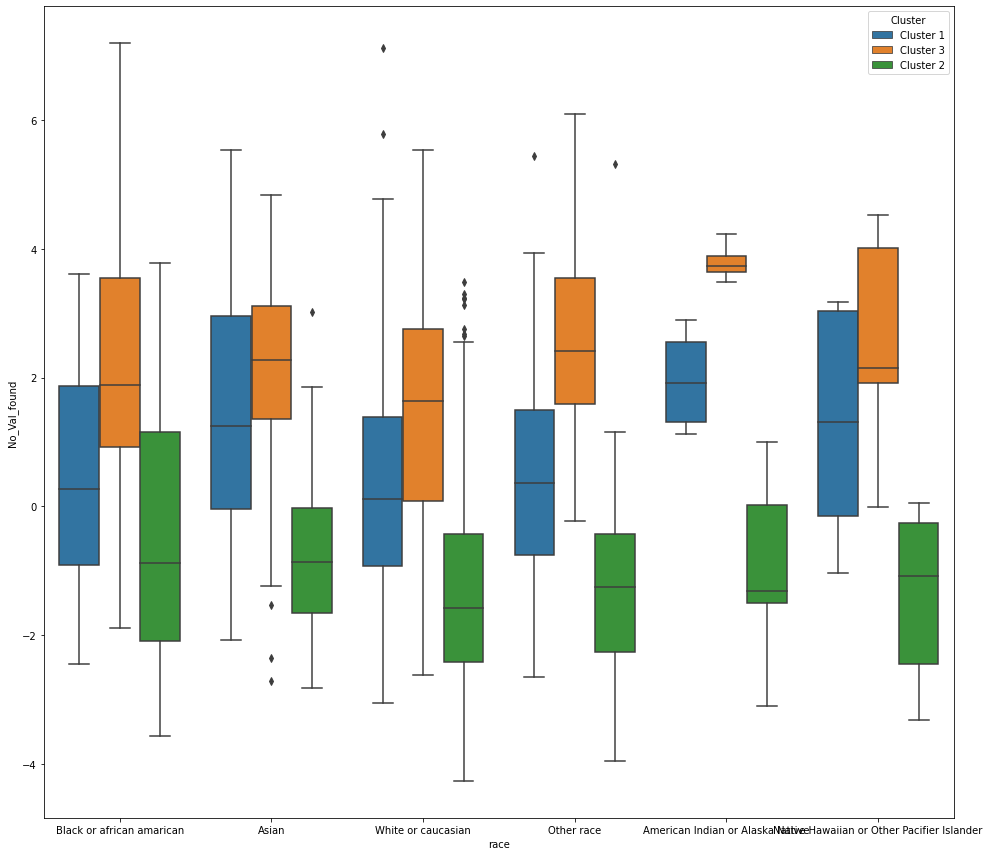

In [54]:
########################
# Race
########################


fig, ax = plt.subplots(figsize = (14, 12))
sns.boxplot(   x = 'race',
               y = 'No_Val_found',
             hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

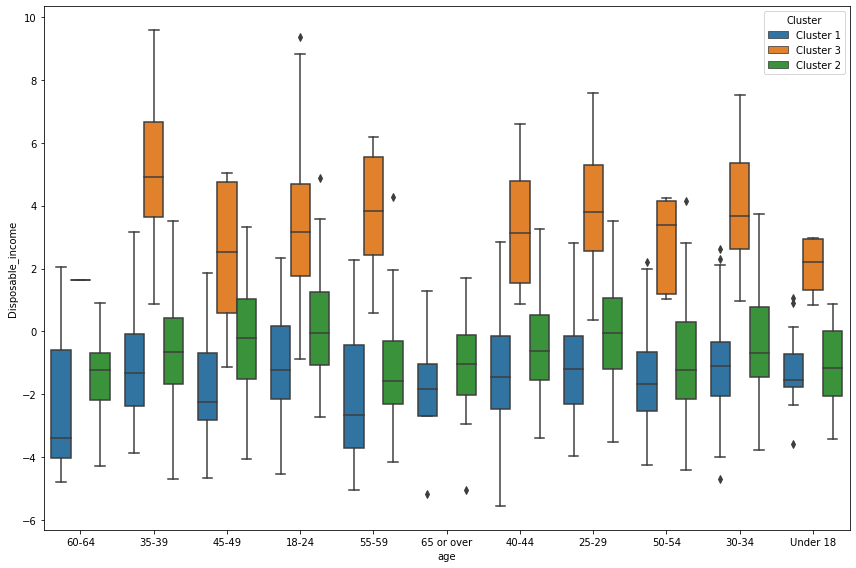

In [53]:
########################
# Age
########################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(   x = 'age',
               y = 'Disposable_income',
             hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

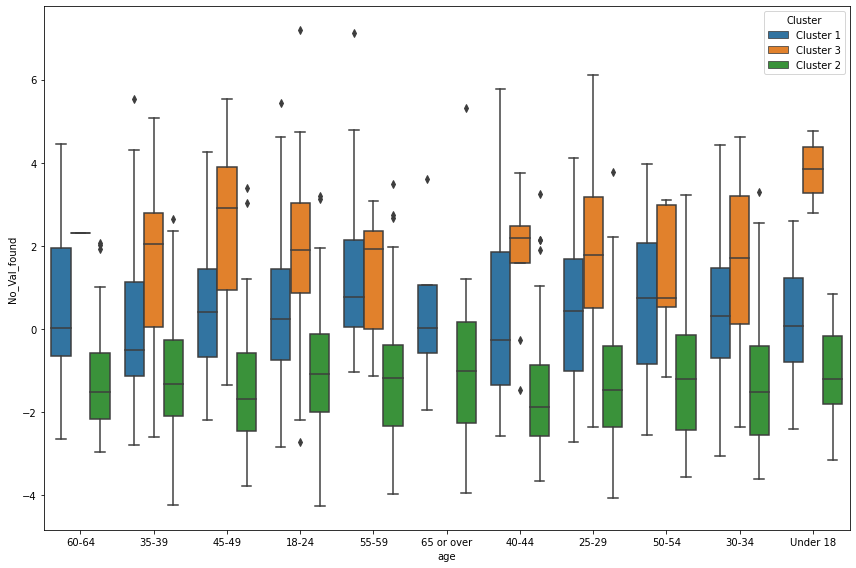

In [55]:
########################
# Age
########################


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(   x = 'age',
               y = 'No_Val_found',
             hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# Key Findings

So as we see that all the boxplots we see that cluster 3 has shown variations in all of the boxplots. The first box plot shows that the highest set of values is for the income ‘50-59’ and the lowest one is for the variable ‘10-14’. This shows that this is the group that should be more focused.
Our principal component no_val_found makes an excellent representation of our cluster 3 with the analysis as they represent our lower income sectors efficiently.   
The next box plot compares race with no_value_found and it shows that the least one is for the variable ‘American Indian or Alaska native’ whereas the highest is for the ‘black or African American. This means that there are fewer sets of values in the low ones and more in the higher ones. During the research we found that disposable income is highly influential towards mobile app purchases and upgrades. Another thing that can be understood is that disposable income with age can be seen to have a direct correlation with mobile app purchases based on its variance. 
It is also significant to note that our clusters have worked really well to interpret our principal components with the demographic data. 
Also, the clusters 1 and 2 can be used as the target population in future for app upgrades and promotions. 
It is also a possibility to further break our clusters into smaller groups to analyze the trends and use the same on other demographics available to see how they interpret with our existing principal components. 
With the current analysis, we recommend that our marketing teams focus on the population types within the clusters 1 and 2, to promote any new features or upgrades.
